In [1]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('transactions.csv')

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# 1. What is the distribution between fraudulent and non-fraudulent transactions?

In [4]:
distribution = df["is_fraud"].value_counts()

In [5]:
distribution

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

# 2. Which age groups are more susceptible to fraudulent transactions?

In [6]:
df2 = df.copy()
bins = [1883, 1901, 1928, 1946, 1965, 1981, 1997, 2013, 2024]

df2['dob'] = df2['dob'].str.slice(0,4).astype(int)
df2['generation'] = pd.cut(df2['dob'], bins=bins)

In [7]:
df2["dob"]

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int32

In [8]:
df2["generation"]

0          (1981, 1997]
1          (1965, 1981]
2          (1946, 1965]
3          (1965, 1981]
4          (1981, 1997]
               ...     
1852389    (1965, 1981]
1852390    (1997, 2013]
1852391    (1965, 1981]
1852392    (1946, 1965]
1852393    (1981, 1997]
Name: generation, Length: 1852394, dtype: category
Categories (8, interval[int64, right]): [(1883, 1901] < (1901, 1928] < (1928, 1946] < (1946, 1965] < (1965, 1981] < (1981, 1997] < (1997, 2013] < (2013, 2024]]

In [9]:
df2["generation"].value_counts()

generation
(1965, 1981]    616544
(1981, 1997]    607074
(1946, 1965]    375216
(1928, 1946]    143747
(1997, 2013]     87831
(1901, 1928]     21982
(1883, 1901]         0
(2013, 2024]         0
Name: count, dtype: int64

In [10]:
counts = pd.crosstab(df2['is_fraud'], df2['generation'])

In [11]:
counts

generation,"(1901, 1928]","(1928, 1946]","(1946, 1965]","(1965, 1981]","(1981, 1997]","(1997, 2013]"
is_fraud,,,,,,
0,21836,142683,372792,613768,604284,87380
1,146,1064,2424,2776,2790,451


In [12]:
label_percentage_per_category = pd.crosstab(df2['generation'], df2['is_fraud'], normalize='all')

In [13]:
label_percentage_per_category

is_fraud,0,1
generation,,
"(1901, 1928]",0.011788,0.000079
"(1928, 1946]",0.077026,0.000574
"(1946, 1965]",0.201249,0.001309
"(1965, 1981]",0.331338,0.001499
"(1981, 1997]",0.326218,0.001506
"(1997, 2013]",0.047171,0.000243


In [14]:
generation_fraud = [(146/(146+21836), (1901,1928)), (1064/(142683 + 1064), (1928,1946)), (2424/(2424+372792), (1946, 1965)), (2776/(613768+2776), (1965, 1981)), (2790/(2790+604284), (1981, 1997)), (451/(451+87380), (1997, 2013))]

In [15]:
generation_fraud

[(0.006641797834591939, (1901, 1928)),
 (0.0074018936047360985, (1928, 1946)),
 (0.006460278879365486, (1946, 1965)),
 (0.004502517257486895, (1965, 1981)),
 (0.0045958153371747105, (1981, 1997)),
 (0.005134861267661759, (1997, 2013))]

# 3. If a fraudulent transaction has been committed, what is the expected number of transaction committed per day with the same victim? (Temporal component asking do fraudulent transactions occur multiple times on the same customer)

In [16]:
df["trans_date_trans_time"]

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1852389    2020-12-31 23:59:07
1852390    2020-12-31 23:59:09
1852391    2020-12-31 23:59:15
1852392    2020-12-31 23:59:24
1852393    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [17]:
df_day = df.copy()

df_day['trans_date_trans_time'] = df['trans_date_trans_time'].str.slice(0,10)


In [18]:
label_rows = df_day[df_day['is_fraud'].isin([1])]

In [19]:
label_rows["trans_date_trans_time"]

2449       2019-01-02
2472       2019-01-02
2523       2019-01-02
2546       2019-01-02
2553       2019-01-02
              ...    
1813872    2020-12-22
1813949    2020-12-22
1814016    2020-12-22
1814204    2020-12-22
1814246    2020-12-22
Name: trans_date_trans_time, Length: 9651, dtype: object

In [20]:
label_rows["first"]

2449        Jason
2472        Misty
2523        Misty
2546        Jason
2553        Misty
            ...  
1813872    Travis
1813949    Travis
1814016    Travis
1814204    Travis
1814246    Travis
Name: first, Length: 9651, dtype: object

In [21]:
df_day['trans_date_trans_time'] 

0          2019-01-01
1          2019-01-01
2          2019-01-01
3          2019-01-01
4          2019-01-01
              ...    
1852389    2020-12-31
1852390    2020-12-31
1852391    2020-12-31
1852392    2020-12-31
1852393    2020-12-31
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [22]:
duplicate_rows = label_rows[label_rows.duplicated(['trans_date_trans_time', 'first', 'last', 'is_fraud'])]

In [23]:
duplicate_rows["first"]

2523        Misty
2546        Jason
2553        Misty
2937        Jason
3527        Jason
            ...  
1813872    Travis
1813949    Travis
1814016    Travis
1814204    Travis
1814246    Travis
Name: first, Length: 7725, dtype: object

In [24]:
duplication_counts = duplicate_rows.groupby(['trans_date_trans_time', 'first', 'last', 'is_fraud']).size().reset_index(name='counts')

In [25]:
print(duplication_counts)

     trans_date_trans_time        first      last  is_fraud  counts
0               2019-01-02        Jason    Murphy         1       3
1               2019-01-02        Misty      Hart         1       2
2               2019-01-03      Heather     Chase         1       3
3               2019-01-03        Jason    Murphy         1       3
4               2019-01-03        Misty      Hart         1       3
...                    ...          ...       ...       ...     ...
1836            2020-12-19  Christopher   Gilbert         1       6
1837            2020-12-20       Lauren  Anderson         1       3
1838            2020-12-21       Lauren  Anderson         1       6
1839            2020-12-21       Travis    Daniel         1       2
1840            2020-12-22       Travis    Daniel         1       6

[1841 rows x 5 columns]


In [26]:
duplication_counts["counts"].mean()

4.196089082020641

# 4. For each purchase "category," plot the mean and standard "amt" between fraudulent transactions and non-fraudulent transactions

In [27]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
sex                       object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [28]:
duplicate_rows_category = df_day[df_day.duplicated(['category', 'is_fraud'])]

In [29]:
duplicate_rows_category

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
5,5,2019-01-01,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
7,7,2019-01-01,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0
10,10,2019-01-01,4642894980163,fraud_Rutherford-Mertz,grocery_pos,24.74,Eddie,Mendez,M,1831 Faith View Suite 653,...,40.7491,-95.0380,7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,40.275891,-96.011548,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1852389,2020-12-31,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,1852390,2020-12-31,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,1852391,2020-12-31,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,1852392,2020-12-31,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


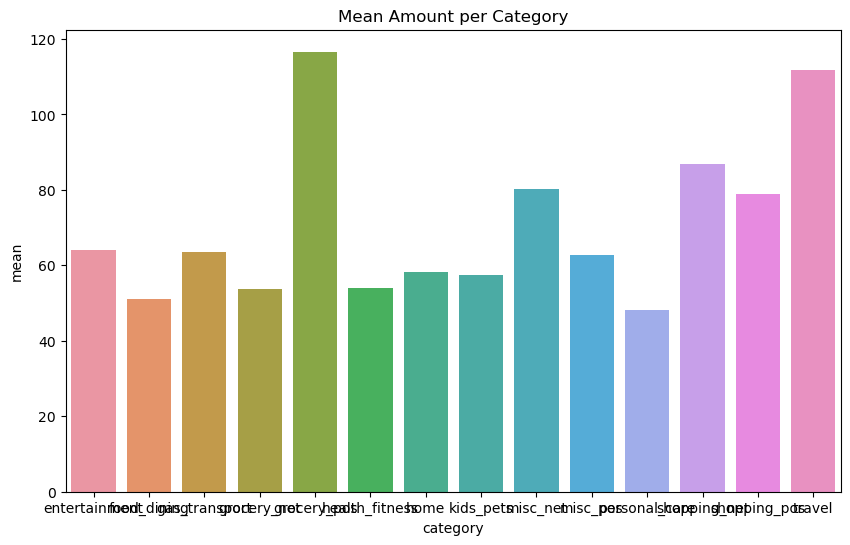

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


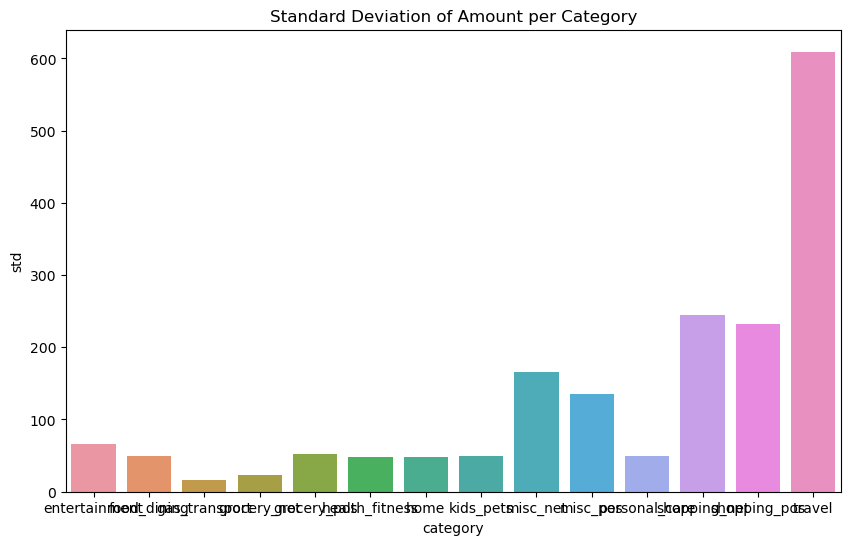

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'

# Create a new dataframe with the mean and standard deviation of 'amt' for fraudulent and non-fraudulent transactions, grouped by 'category'
grouped_df = df.groupby('category')['amt'].agg(['mean', 'std']).reset_index()

# Plot the mean 'amt' for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='mean',data=grouped_df)
plt.title('Mean Amount per Category')
plt.show()

# Plot the standard deviation of 'amt' for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='std',  data=grouped_df)
plt.title('Standard Deviation of Amount per Category')
plt.show()

# 5. What is the distribution between time transactions between fraudulent transactions and non-fraudulent transactions? What is the most likely time of a fraudulent transaction?

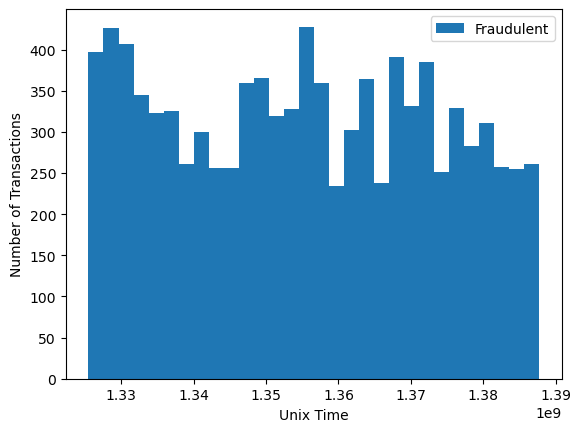

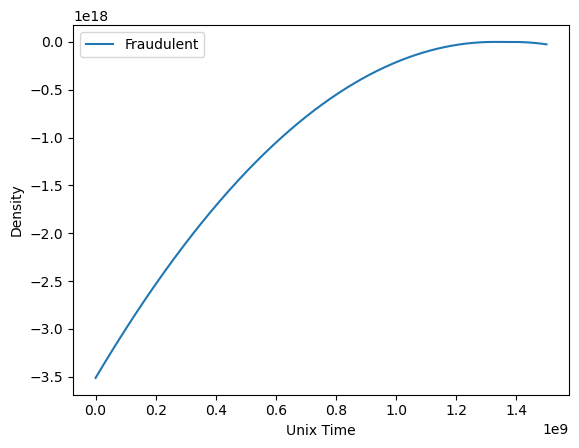

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming the data is in a DataFrame called 'df'
fraud_transactions = df[df['is_fraud'] == 1]['unix_time']
non_fraud_transactions = df[df['is_fraud'] == 0]['unix_time']

# Plotting the histogram
plt.hist(fraud_transactions, bins=30, stacked=True, label=['Fraudulent', 'Non-fraudulent'])
plt.xlabel('Unix Time')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Plotting the KDE
kde_fraud = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(fraud_transactions.values.reshape(-1, 1))

x_axis = np.linspace(0, 1500000000, 1000)
plt.plot(x_axis, kde_fraud.score_samples(x_axis.reshape(-1, 1)), label='Fraudulent')
plt.xlabel('Unix Time')
plt.ylabel('Density')
plt.legend()
plt.show()

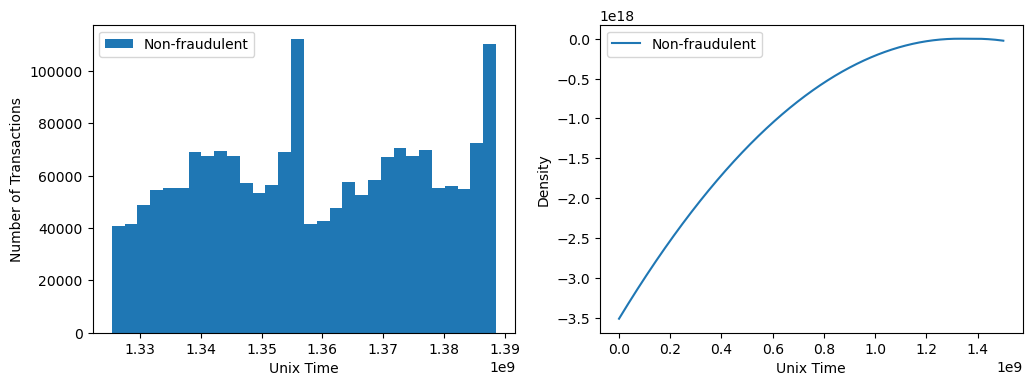

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming the data is in a DataFrame called 'df'
fraud_transactions = df[df['is_fraud'] == 1]['unix_time']
non_fraud_transactions = df[df['is_fraud'] == 0]['unix_time']

# Plotting the histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(non_fraud_transactions, bins=30, stacked=True, label= 'Non-fraudulent')
ax[0].set_xlabel('Unix Time')
ax[0].set_ylabel('Number of Transactions')
ax[0].legend()

# Plotting the KDE
kde_non_fraud = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(non_fraud_transactions.values.reshape(-1, 1))

x_axis = np.linspace(0, 1500000000, 1000)
ax[1].plot(x_axis, kde_non_fraud.score_samples(x_axis.reshape(-1, 1)), label='Non-fraudulent')
ax[1].set_xlabel('Unix Time')
ax[1].set_ylabel('Density')
ax[1].legend()

plt.show()

In [49]:
df_unix = df.copy()
df_unix['trans_date_trans_time'] = df['trans_date_trans_time'].str.slice(11,19)

df_unix['trans_date_trans_time'] = pd.to_datetime(df_unix['trans_date_trans_time'])
avg_time = df_unix.groupby('is_fraud')['trans_date_trans_time'].mean()

print(avg_time)

C:\Users\pevah\AppData\Local\Temp\ipykernel_68068\1161402027.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_unix['trans_date_trans_time'] = pd.to_datetime(df_unix['trans_date_trans_time'])


is_fraud
0   2024-02-10 13:17:57.915524864
1   2024-02-10 14:32:59.004766208
Name: trans_date_trans_time, dtype: datetime64[ns]


Year turned funky because of the conversions, but I believe that is the average hour, which does not show a ton of difference between non fraud and fraud

In [48]:
df_unix["trans_date_trans_time"]

0          00:00:18
1          00:00:44
2          00:00:51
3          00:01:16
4          00:03:06
             ...   
1852389    23:59:07
1852390    23:59:09
1852391    23:59:15
1852392    23:59:24
1852393    23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

# 6. Is there a relationship between the distance between customer location (lat/lon) and merchant location (merch_lat/merch_lon) and fraudulent transactions?

In [52]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d

In [54]:
df_latlong = df.copy()
df_latlong['distance'] = df_latlong.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Calculate the correlation between distance and fraud
correlation = df_latlong['distance'].corr(df['is_fraud'])
print('Correlation between distance and fraud:', correlation)

Correlation between distance and fraud: 0.0003591679386918591


Using this function and formula to determine the distance between the two latlongs, then seeing if there was a correlation between that distance and if the data was fraudulent. The coorelation was low, but it may be different if instead of distance the coorellation looked at specific locations, though then that still would not matter the distance just the fraud location. 

# 7. Are certain states, cities, and zip codes more susceptible to fraudulent transactions?

In [49]:
df_location = pd.DataFrame()
df_location["city"] = df["city"].astype('category')
df_location["state"] = df["state"].astype('category')
df_location["zip"] = df["zip"].astype('category')
df_location["is_fraud"] = df["is_fraud"].astype('category')

In [53]:
df_location["city"] = df_location["city"].cat.codes.astype('float')
df_location["state"] = df_location["state"].cat.codes.astype('float')
df_location["zip"] = df_location["zip"].cat.codes.astype('float')
df_location["is_fraud"] = df_location["is_fraud"].cat.codes.astype('float')

In [56]:
df_location.dtypes

city        float64
state       float64
zip         float64
is_fraud    float64
dtype: object

In [55]:
correlation = df_location[['is_fraud', 'city', 'state', 'zip']].corr()
print(correlation)

          is_fraud      city     state       zip
is_fraud  1.000000 -0.001107 -0.000252 -0.002410
city     -0.001107  1.000000 -0.042611  0.076487
state    -0.000252 -0.042611  1.000000 -0.111386
zip      -0.002410  0.076487 -0.111386  1.000000


# 8. What is the distribution of fraudulent and non-fraudulent transactions occurring for each day of the week (i.e., Sunday, Monday, etc.), each month of the year (i.e., January, February)?

In [56]:
df_days = df.copy()
df_days['trans_date_trans_time'] = pd.to_datetime(df_days['trans_date_trans_time'])
df_days['day_of_week'] = df_days['trans_date_trans_time'].dt.day_name()
df_days['day_of_month'] = df_days['trans_date_trans_time'].dt.day


In [64]:
fraud_transactions

,day_of_week,day_of_month,fraud_count
0,Friday,1,72
1,Friday,2,18
2,Friday,3,57
3,Friday,4,46
4,Friday,5,22
...,...,...,...
210,Wednesday,26,21
211,Wednesday,27,42
212,Wednesday,28,11
213,Wednesday,29,31


In [67]:

# Count the number of fraudulent and non-fraudulent transactions per day
fraud_transactions = df_days[df_days['is_fraud'] == 1].groupby(['day_of_week', 'day_of_month']).size().reset_index(name='fraud_count')
non_fraud_transactions = df_days[df_days['is_fraud'] == 0].groupby(['day_of_week', 'day_of_month']).size().reset_index(name='non_fraud_count')

# Merge the two dataframes on 'day_of_week' and 'day_of_month'
merged_df = fraud_transactions.merge(non_fraud_transactions, on=['day_of_week', 'day_of_month'], suffixes=('_fraud', '_non_fraud'))


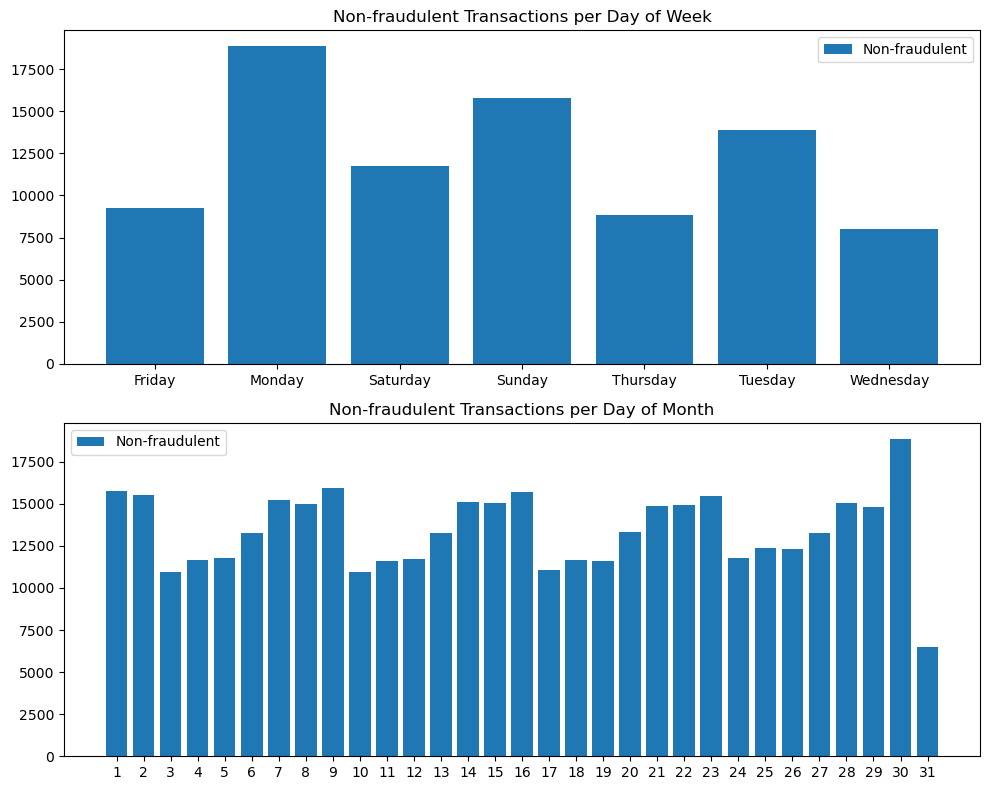

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].bar(merged_df['day_of_week'], merged_df['non_fraud_count'], label='Non-fraudulent')
ax[0].set_title('Non-fraudulent Transactions per Day of Week')
ax[0].set_xticks(range(7))
ax[0].set_xticklabels(merged_df['day_of_week'].unique())
ax[0].legend()

ax[1].bar(merged_df['day_of_month'], merged_df['non_fraud_count'], label='Non-fraudulent')
ax[1].set_title('Non-fraudulent Transactions per Day of Month')
ax[1].set_xticks(range(1, 32))
ax[1].set_xticklabels(merged_df['day_of_month'].unique())
ax[1].legend()

plt.tight_layout()
plt.show()

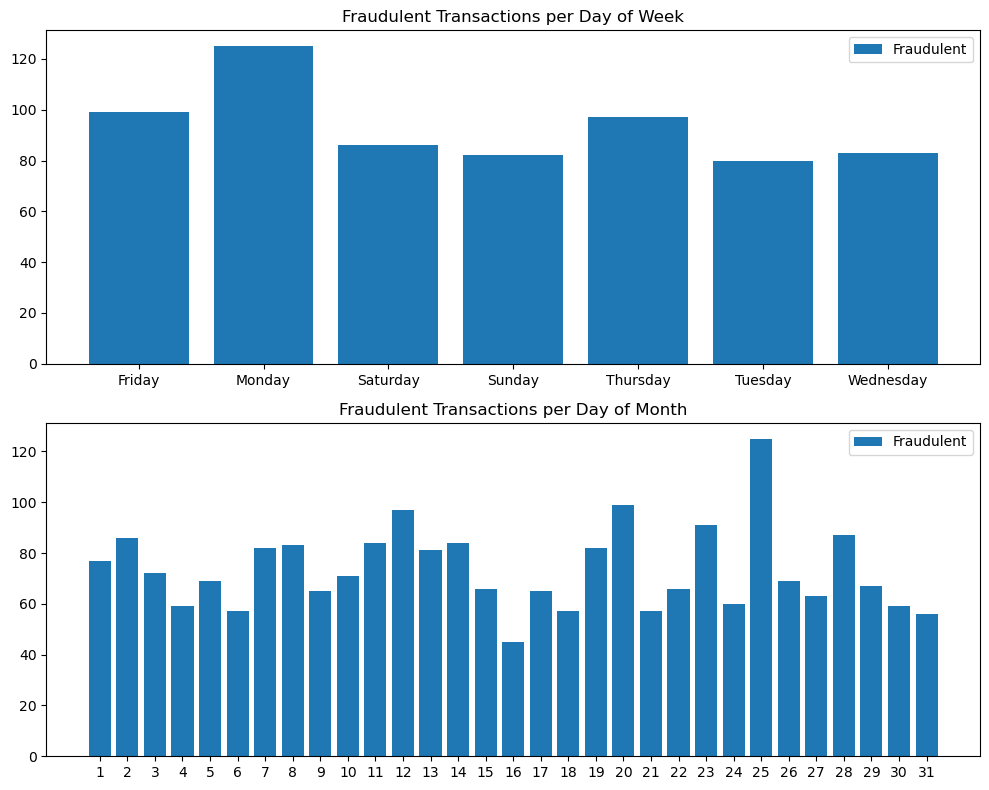

In [65]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].bar(merged_df['day_of_week'], merged_df['fraud_count'], label='Fraudulent')
ax[0].set_title('Fraudulent Transactions per Day of Week')
ax[0].set_xticks(range(7))
ax[0].set_xticklabels(merged_df['day_of_week'].unique())
ax[0].legend()

ax[1].bar(merged_df['day_of_month'], merged_df['fraud_count'], label='Fraudulent')
ax[1].set_title('Fraudulent Transactions per Day of Month')
ax[1].set_xticks(range(1, 32))
ax[1].set_xticklabels(merged_df['day_of_month'].unique())
ax[1].legend()

plt.tight_layout()
plt.show()

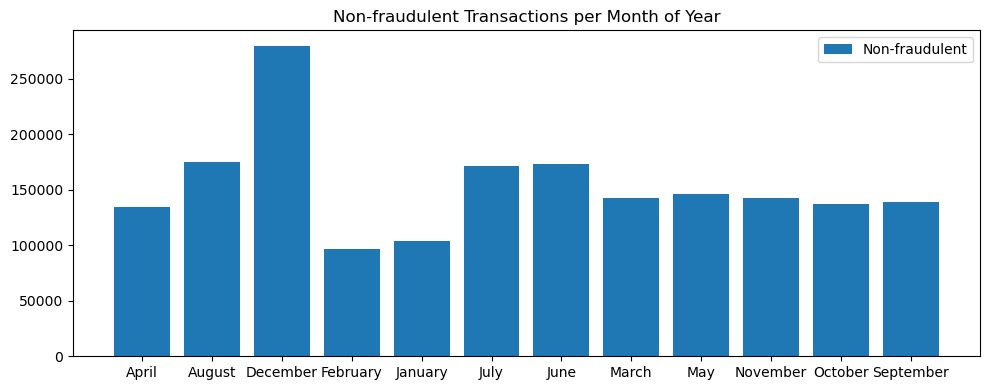

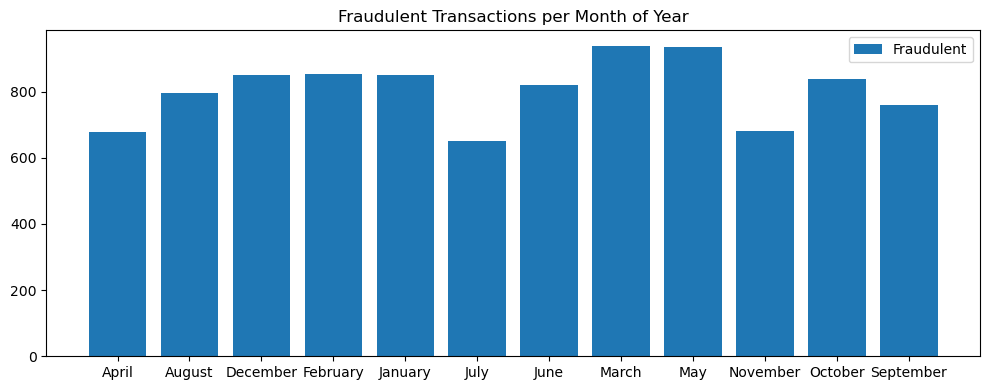

In [73]:
# Extract the month from the 'trans_date_trans_week' column
df_days['month_of_year'] = df_days['trans_date_trans_time'].dt.month_name()

# Count the number of fraudulent and non-fraudulent transactions per month
fraud_transactions = df_days[df_days['is_fraud'] == 1].groupby(['month_of_year']).size().reset_index(name='fraud_count')
non_fraud_transactions = df_days[df_days['is_fraud'] == 0].groupby(['month_of_year']).size().reset_index(name='non_fraud_count')

# Merge the two dataframes on 'month_of_year'
merged_df = fraud_transactions.merge(non_fraud_transactions, on=['month_of_year'], suffixes=('_fraud', '_non_fraud'))

# Create a bar graph for the month of the year
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.bar(merged_df['month_of_year'], merged_df['non_fraud_count'], label='Non-fraudulent')
ax.set_title('Non-fraudulent Transactions per Month of Year')
ax.set_xticks(range(12))
ax.set_xticklabels(merged_df['month_of_year'].unique())
ax.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.bar(merged_df['month_of_year'], merged_df['fraud_count'], label='Fraudulent')
ax.set_title('Fraudulent Transactions per Month of Year')
ax.set_xticks(range(12))
ax.set_xticklabels(merged_df['month_of_year'].unique())
ax.legend()

plt.tight_layout()
plt.show()

# 9. Compared to any other time of the year, how prevalent are fraudulent transactions during the holidays (11-30 to 12-31)? During post-holidays (1-1 to 2-28)? During the summer (05-24 to 09-01)?

Luckily the previous graphs answer this question incredibly well. Compared to non-fraudulent transaction, fraudulent is almost consistent acrossed the whole year. Non-fraud the difference between the holidays and early year is nearly triple, and for summer it is double, where as for fraudulent, they are statisitically pretty similar with nearly no difference. The graph above this one shows that well. 

# 10. Is there a relationship between between "city_pop" and incidence of fraud?


In [57]:
label_percentage_per_job = pd.crosstab(df2['city_pop'], df2['is_fraud'], normalize='all')

In [58]:
result = label_percentage_per_job.reset_index().sort_values(by=1, ascending=False)


In [59]:
pd.set_option('display.max_rows', 10)


In [60]:
result

is_fraud,city_pop,0,1
890,2906700,0.003145,0.000021
881,1263321,0.002754,0.000021
886,1577385,0.001968,0.000019
866,673342,0.002748,0.000018
166,606,0.004328,0.000017
...,...,...,...
788,103927,0.000394,0.000000
451,3263,0.000788,0.000000
594,7646,0.002365,0.000000
163,595,0.001576,0.000000


# 11. Are certain "job" types susceptible to fraudulent transactions?

In [61]:
label_percentage_per_job = pd.crosstab(df2['job'], df2['is_fraud'], normalize='all')

In [62]:
result = label_percentage_per_job.reset_index().sort_values(by=1, ascending=False)


In [63]:
pd.set_option('display.max_rows', 10)


In [64]:
result

is_fraud,job,0,1
383,Quantity surveyor,0.004325,0.000037
309,Naval architect,0.006677,0.000036
287,Materials engineer,0.006289,0.000033
42,Audiological scientist,0.004720,0.000031
421,Senior tax professional/tax inspector,0.003142,0.000031
...,...,...,...
437,Statistician,0.001966,0.000002
107,Contractor,0.002356,0.000001
163,"Engineer, drilling",0.001576,0.000000
161,"Engineer, communications",0.001182,0.000000


In [66]:
df_job = pd.DataFrame()
df_job["city"] = df["city"].astype('category')
df_job["is_fraud"] = df["is_fraud"].astype('category')

In [67]:
df_job["job"] = df_job["city"].cat.codes.astype('float')
df_job["is_fraud"] = df_job["is_fraud"].cat.codes.astype('float')

In [68]:
correlation = df_job['is_fraud'].corr(df_job['job'])
print(f"The correlation between the label and the datapoint is {correlation}")

The correlation between the label and the datapoint is -0.0011073204129480893


# 12. Think of at least 4 more questions and provide the answers to them.

## 1. Some of the variables by themselves showed low correlation, what happens if you bring in investigations from multiple to test correlations? Say from question 2, 7, and 11 to see the results

In [75]:
df_test = pd.DataFrame()

df_test["job"] = df_job["job"]
df_test["city"] = df_location["city"]
df_test["state"] = df_location["state"]
df_test["zip"] = df_location["zip"]
df_test["dob"] = df2["dob"]
df_test["is_fraud"] = df_location["is_fraud"]

In [78]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_test[['job', 'city', 'state', 'zip', 'dob']] = min_max_scaler.fit_transform(df_test[['job', 'city', 'state', 'zip', 'dob']])


In [79]:
X = df_test.loc[:, df_test.columns != 'is_fraud'].values
y = df_test.loc[:, df_test.columns == 'is_fraud'].values.ravel()

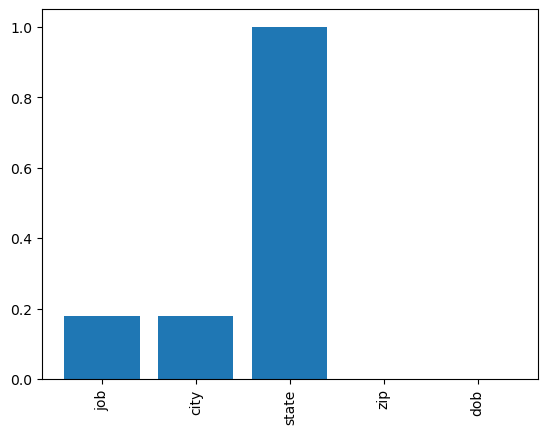

In [80]:
from sklearn.feature_selection import SelectPercentile, f_classif


selector = SelectPercentile(f_classif, percentile=10)
# Fit the data
selector.fit(X, y)
scores = selector.pvalues_
scores /= scores.max()

# Display
cols = list(df_test.loc[:, df_test.columns != 'is_fraud'].columns.values)
y_pos = np.arange(len(cols))
plt.bar(y_pos, scores)
plt.xticks(y_pos, cols, rotation=90)
plt.show()

## 2. Select possible features that would be beneficial to a final use case. 

## 3. List Features that have no use 

Some features to remove that have no use to us are typically features that are simply tokens to count a transaction, or something to keeptrack of. Some features are redundant and simply are not used. Here is the list of features that are for sure removed before training a model:

* trans_num -- a unique id not useful for training
* cc_num -- should be unique per user and not useful 
* unix time -- redundant with transaction time in another feature
* City -- geographical feature that is redundant and harder to use then lat/long
* State -- geographical feature that is redundant and harder to use then lat/long
* zipcode -- geographical feature that is redundant and harder to use then lat/long
* unnamed: 0 -- not even sure what this feature was suppose to be, so lets remove it just incase


## 4. 